## Logistic Regression & KNN - Social Network Ads
*Source: https://www.youtube.com/watch?v=I7NrVwm3apg&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=13*  
*Watch From 28mins and then 104mins*

### What is Logistic Regression?
**If you have not already done so, you should read this article:** https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/  

### What is KNN?
The following content has been taken from this source: https://www.mygreatlearning.com/blog/knn-algorithm-introduction/
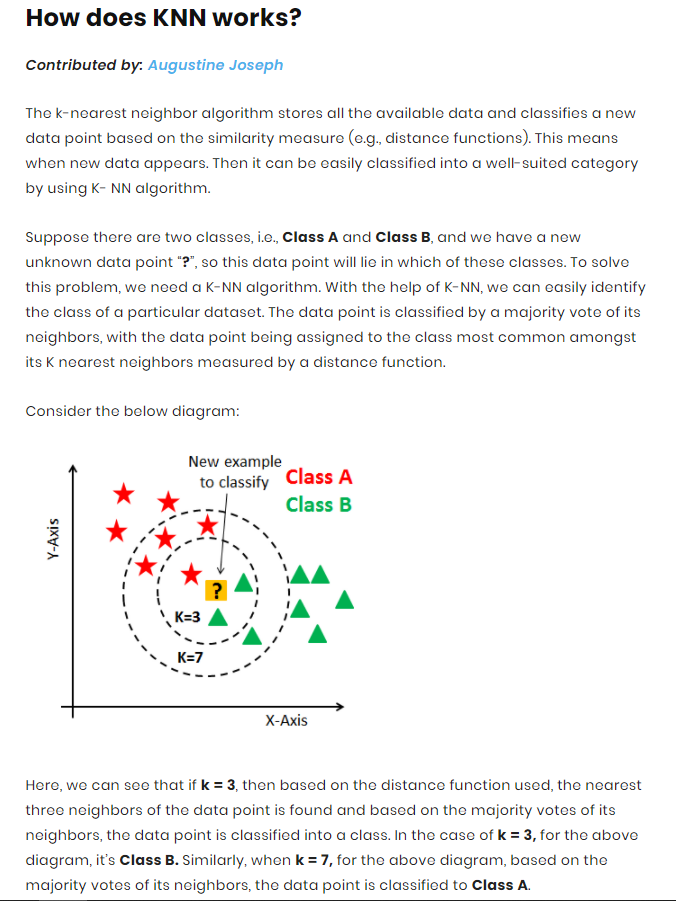



**Take some time and read this aricle also:** https://learn.g2.com/k-nearest-neighbor  

In [11]:
#Importing the Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [12]:
#importing the dataset
dataset=pd.read_csv('Social_Network_Ads.csv')

In [13]:
#View the head
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
#Check for null values
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
#View the shape of the dataset
dataset.shape

(400, 5)

In [16]:
#Checking the structure of our data 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Extracting the Dependent and Independent Varaiables

In [17]:
#Extracting the independent variables - age and salary
#X = dataset.iloc[:,[2,3]].values
#Extracting the dependent variables - Purchased
#y = dataset.iloc[:,[4]].values

#Or
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [18]:
#View the top ten rows of X
X[:10]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [19]:
#View the top ten rows of y
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

### Visualising the Data

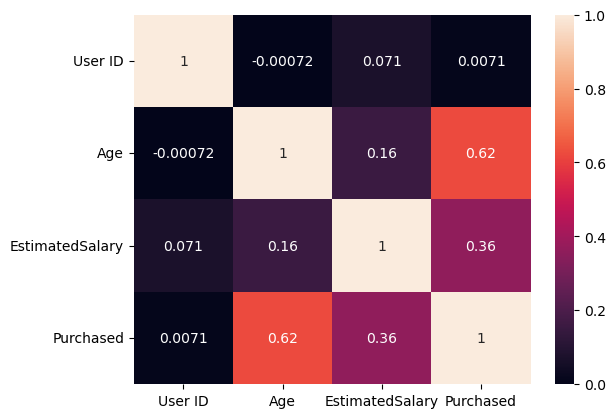

In [42]:
#Visualising the dataset with by drawing a correlation matrix
temp_df = dataset.iloc[:,[0, 2, 3, 4]]
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

In [21]:
#Group and Count the values in the Gender 
dataset.groupby(['Gender']).count()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,204,204,204,204
Male,196,196,196,196


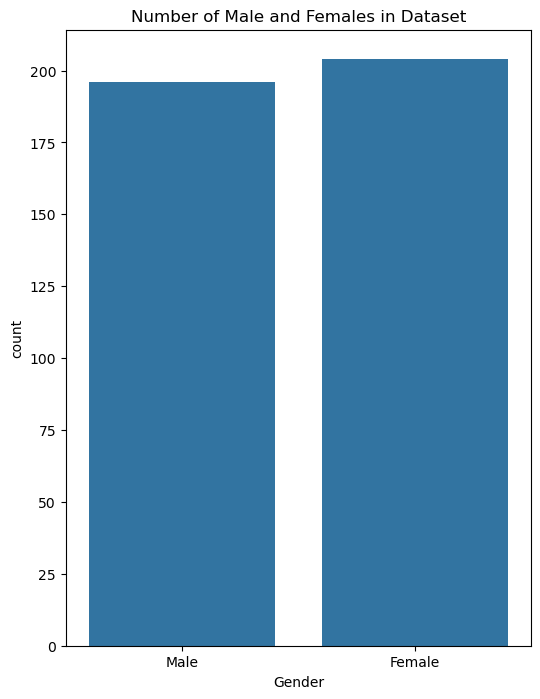

In [22]:
#Explotory Data Analysis
#Counting the Number of persons who purchased the car or not and diving them by their Gender

#Set the plot size to 6 by 8
plt.figure(figsize=(6, 8))

#Create a countplot to show the number of passengers in each class 
sns.countplot(x='Gender', data=dataset )

#Add a meaningful title
plt.title('Number of Male and Females in Dataset')

#Display the plot
plt.show()

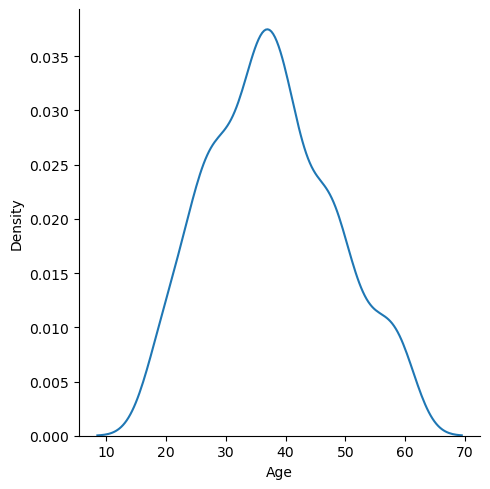

In [23]:
#Cheking the pattern of the Age of the persons of our dataset
sns.displot(data=dataset['Age'], kind="kde")

#OR
#sns.displot(data=dataset['Age'], bins=30)

plt.show()

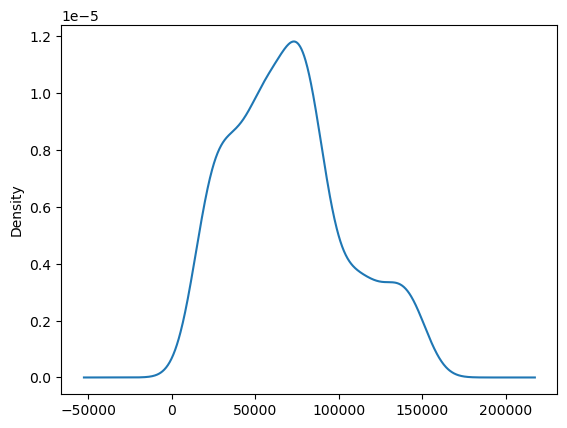

In [24]:
#Analysing the pattern of the estimated salary of the persons in our dataset
dataset['EstimatedSalary'].plot(kind='kde')
plt.show()

### Splitting the Dataset into Train and Test

In [25]:
#Dividing the data into train and test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Scaling the Data

In [26]:
#Feature Scaling - changes the data to it all between -1 and 1 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### WHY DO WE SCALE THE DATA

Machine learning models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the domain may be different for each variable.

Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

Read More: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

### Choosing a Model - Logistic

In [27]:
#Using logistic Regression to make prediction 
from sklearn.linear_model import LogisticRegression

### Fitting the Model to the Training Set

In [28]:
#Making the object of out Logistic Regression model 
#fitting the training data to our model to train our model
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Predicting the Test Data

In [29]:
#Making predictions
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Evaluating the Model

In [30]:
#Checking the performace of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report\n',classification_report(y_test,y_pred))
print('\n')
print('Accuracy Of Our Model',accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[65  3]
 [ 8 24]]


Classification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



Accuracy Of Our Model 0.89


## K-Nearest Neighbour

### Choosing a Model - KNN

In [32]:
#Now Training Another Model i.e K-nearest neighbours on the same datatset to obtain better accuarcy
from sklearn.neighbors import KNeighborsClassifier

In [33]:
#Making an object of the knn model 
#Specifiy the number of neighbours as 5 intailly, we can tweak this parameters depending upon the need.
knn_model=KNeighborsClassifier(n_neighbors=5)

### Fitting the Model to the Training Set

In [34]:
#Fitting the model to our train dataset to train our model
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### Predicting the Test Data

In [35]:
#Making Predictions from our Model
knn_predictions=knn_model.predict(X_test)

### Evaluating the Model

In [36]:
#Evaluating the Performance of our Model 
print('Confusion Matrix \n',confusion_matrix(y_test,knn_predictions))
print('\n')
print('Classification Report \n',classification_report(y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model ',accuracy_score(y_test,knn_predictions))

Confusion Matrix 
 [[64  4]
 [ 3 29]]


Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Accuracy Of Our Model  0.93


## Understanding the Results

#### WHAT IS A CONFUSION MATRIX?
A confusion matrix, also known as an error matrix, is a technique for summarizing the performance of a classification algorithm.  Classification accuracy (see the discussion lower down) alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

A confusion matrix uses a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

#### WHAT IS A CLASSIFICATION REPORT?  
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

TN / True Negative: when a case was negative and predicted negative
TP / True Positive: when a case was positive and predicted positive
FN / False Negative: when a case was positive but predicted negative
FP / False Positive: when a case was negative but predicted positive

**Precision – What percent of your predictions were correct?**
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Precision – Accuracy of positive predictions.  
Precision = TP/(TP + FP)

**Recall – What percent of the positive cases did you catch?**
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

**F1 score – What percent of positive predictions were correct?**
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#### WHAT IS AN ACCURACY SCORE?
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.  

It works well only if there are equal number of samples belonging to each class.  
For example, consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.  When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. 

Classification Accuracy is great, but gives us the false sense of achieving high accuracy.  The real problem arises, when the cost of misclassification of the minor class samples are very high. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests.